# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | santa eularia des riu
Processing Record 4 of Set 1 | atafu village
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | invercargill
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | susuman
Processing Record 11 of Set 1 | kailua-kona
Processing Record 12 of Set 1 | preobrazheniye
Processing Record 13 of Set 1 | fortuna
Processing Record 14 of Set 1 | hobyo
Processing Record 15 of Set 1 | wanning
Processing Record 16 of Set 1 | eastham
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | qaqortoq
Processing Record 19 of Set 1 | utrik
Processing Record 20 of Set 1 | nagqu
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | geraldton
Processing Reco

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,5.78,75,35,3.04,GS,1741629241
1,punta arenas,-53.1500,-70.9167,8.06,53,75,12.35,CL,1741629077
2,santa eularia des riu,38.9846,1.5341,15.01,77,20,2.06,ES,1741629243
3,atafu village,-8.5421,-172.5159,27.57,78,28,6.07,TK,1741629244
4,albany,42.6001,-73.9662,14.20,34,31,0.89,US,1741629157


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,5.78,75,35,3.04,GS,1741629241
1,punta arenas,-53.1500,-70.9167,8.06,53,75,12.35,CL,1741629077
2,santa eularia des riu,38.9846,1.5341,15.01,77,20,2.06,ES,1741629243
3,atafu village,-8.5421,-172.5159,27.57,78,28,6.07,TK,1741629244
4,albany,42.6001,-73.9662,14.20,34,31,0.89,US,1741629157


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

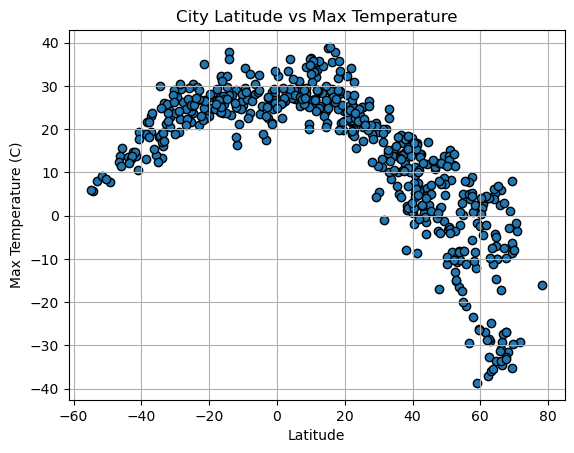

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = 'o', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

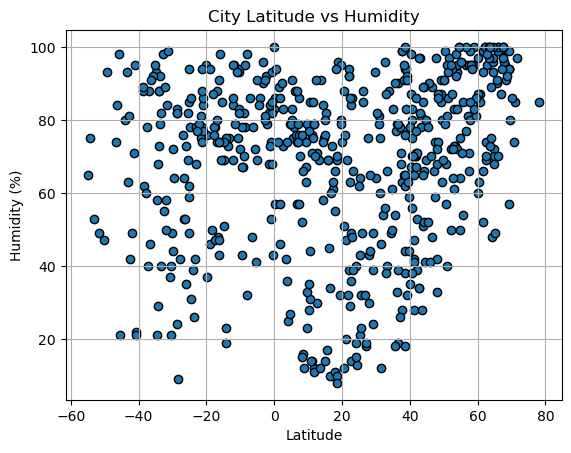

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = 'o', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

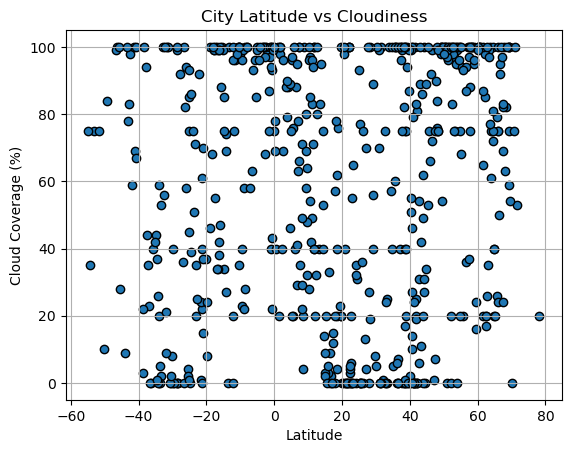

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker = 'o', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloud Coverage (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

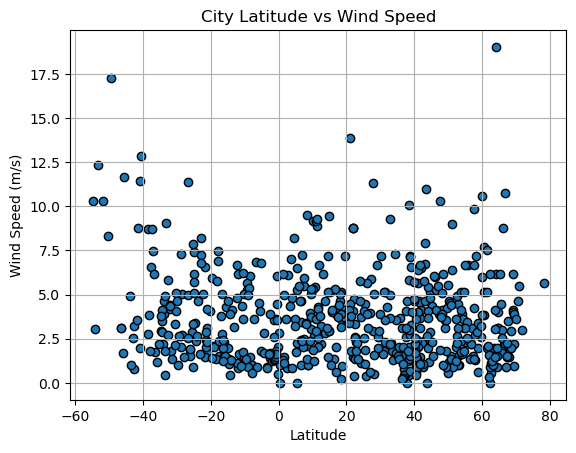

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = 'o', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def linear_regress(x, y):
    r = st.pearsonr(x, y)
    print(f"r^2-value: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r")
    plt.annotate(line_eq, (x.min(),y.min()), fontsize=12, color="r")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")
    plt.tight_layout()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,santa eularia des riu,38.9846,1.5341,15.01,77,20,2.06,ES,1741629243
4,albany,42.6001,-73.9662,14.20,34,31,0.89,US,1741629157
5,bethel,41.3712,-73.4140,16.70,28,0,4.63,US,1741629246
7,ilulissat,69.2167,-51.1000,8.01,57,75,6.17,GL,1741629248
8,georgetown,5.4112,100.3354,27.96,75,20,2.24,MY,1741629094


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,5.78,75,35,3.04,GS,1741629241
1,punta arenas,-53.1500,-70.9167,8.06,53,75,12.35,CL,1741629077
3,atafu village,-8.5421,-172.5159,27.57,78,28,6.07,TK,1741629244
6,invercargill,-46.4000,168.3500,13.90,84,100,3.13,NZ,1741628864
16,hermanus,-34.4187,19.2345,18.22,68,26,3.50,ZA,1741629055


###  Temperature vs. Latitude Linear Regression Plot

r^2-value: -0.8575888615357574


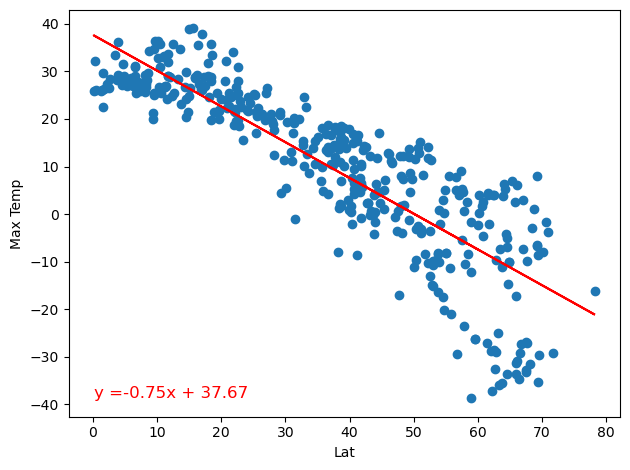

In [23]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

r^2-value: 0.6787031191650307


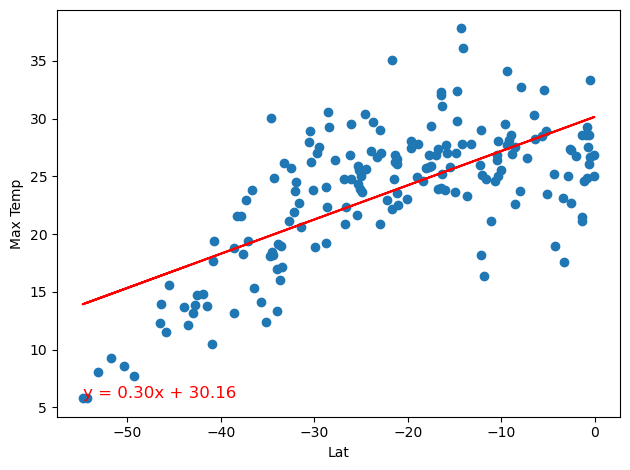

In [25]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"]) 

**Discussion about the linear relationship:** With r^2-values of -0.86 and 0.68, there is a strong correlation between distance from the equator and Max Temperature. The Northern Hemisphere shows a strong negative correlation, while the Southern Hemisphere exhibits a strong positive correlation.

### Humidity vs. Latitude Linear Regression Plot

r^2-value: 0.40102016219025405


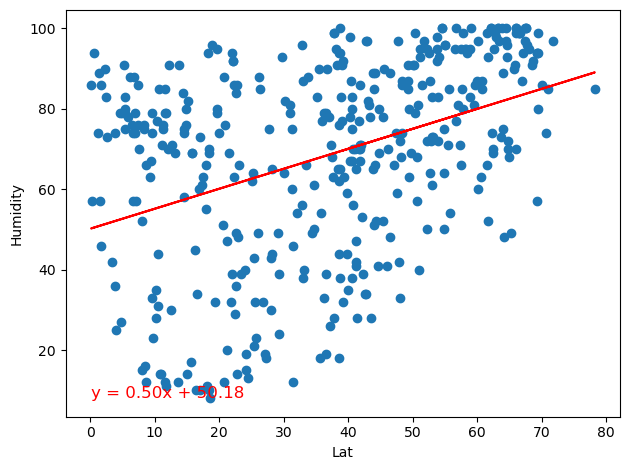

In [26]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

r^2-value: 0.20520182563412592


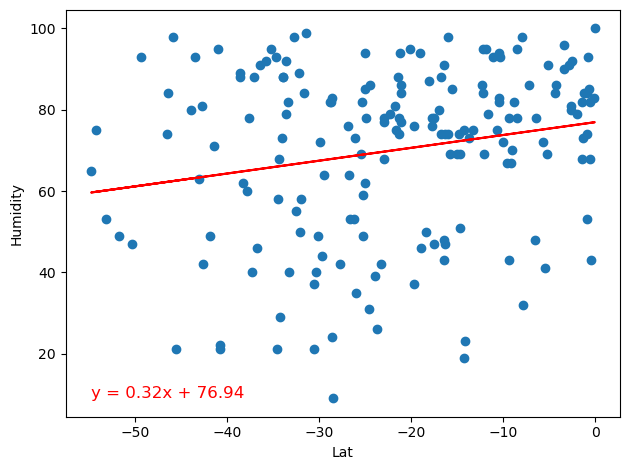

In [27]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** The r^2 value of 0.40 in the Northern Hemisphere suggests a moderate correlation, meaning latitude explains 40% of the variance in humidity. In contrast, the Southern Hemisphere's r^2 value of 0.21 indicates a weaker relationship, with latitude accounting for only 21% of humidity variation. This weaker correlation in the Southern Hemisphere may be due to its larger ocean coverage, which helps regulate humidity levels more consistently across latitudes.

### Cloudiness vs. Latitude Linear Regression Plot

r^2-value: 0.21460262396594817


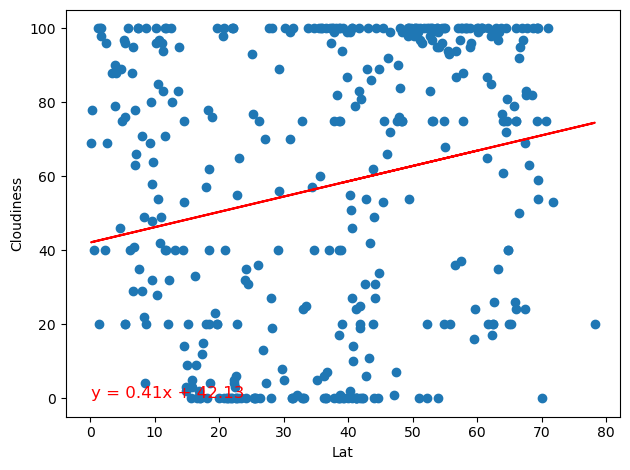

In [28]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

r^2-value: 0.3033666254955495


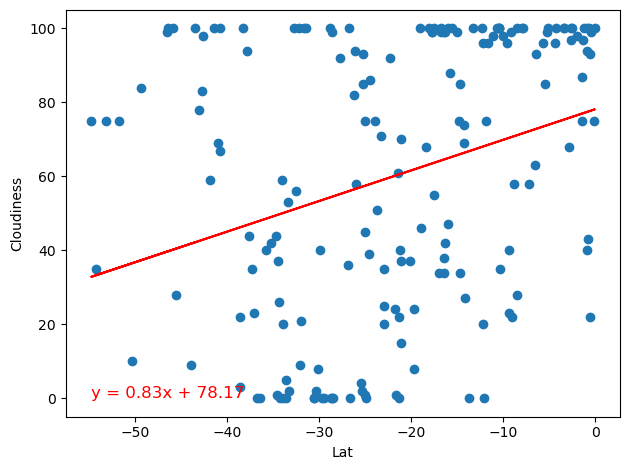

In [29]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** Similar to the model above, lower r^2 values of 0.21 (northern) and 0.30 (southern) indicate weak currelations between the x and y variables.

### Wind Speed vs. Latitude Linear Regression Plot

r^2-value: -0.054316200346046735


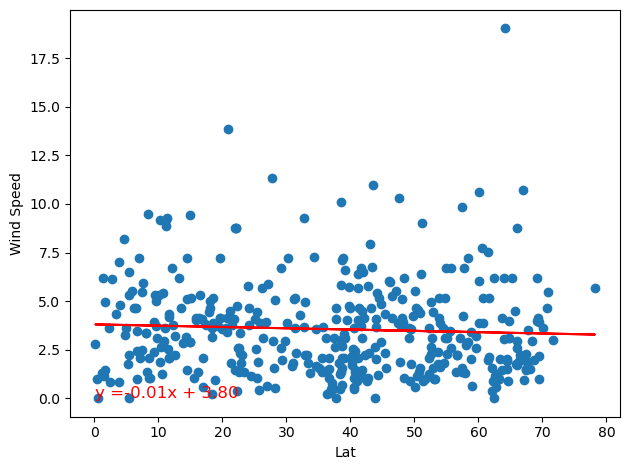

In [30]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

r^2-value: -0.38151704985123214


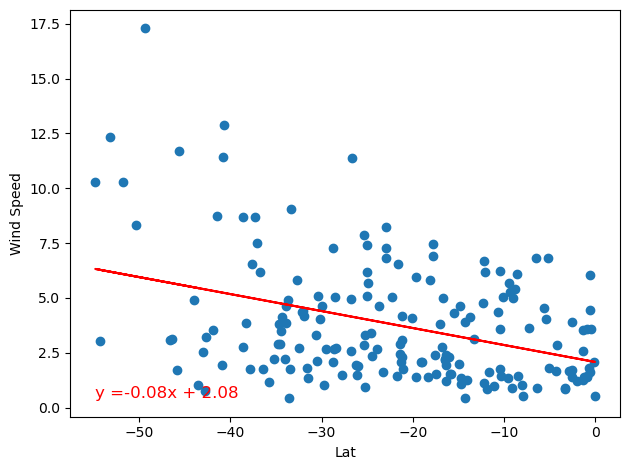

In [31]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** Very little correlation between wind speed and city latitude for Northern and Southern hemishpere cities